***Cantidad de postulaciones por hora en las top 3 áreas de trabajo***

En este notebook se estudiará si existe alguna relación entre la cantidad de postulaciones según la hora y el área de trabajo. En particular, se tomarán las tres áreas más populares para contar con la mayor cantidad de información posible

In [11]:
#Realizo imports
import pandas as pd
import numpy as npy
import matplotlib as plt
import csv
%matplotlib inline

In [2]:
dfavisos = pd.read_csv("TP1/fiuba_6_avisos_detalle.csv")
dfavisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


Me quedo con las columnas del dataframe que me interesan analizar en este caso.

In [3]:
dfarea = dfavisos[["idaviso","nombre_area"]]
dfarea.head()

,idaviso,nombre_area
0,8725750,Comercial
1,17903700,Salud
2,1000150677,Transporte
3,1000610287,Transporte
4,1000872556,Producción


Con la siguiente línea, se puede ver a simple vista cuáles son aquellas áreas que tienen la mayor cantidad de avisos:

In [4]:
dfarea.groupby("nombre_area")["idaviso"].count().sort_values(ascending = False).head()

nombre_area
Ventas            1659
Comercial          983
Administración     901
Producción         821
Programación       576
Name: idaviso, dtype: int64

Nos quedamos con las top 3, realizando localizaciones para filtrar el resto.

In [5]:
dfventas = dfarea.loc[dfarea["nombre_area"]=="Ventas",]
dfcomercial = dfarea.loc[dfarea["nombre_area"]=="Comercial",]
dfadministracion = dfarea.loc[dfarea["nombre_area"]=="Administración",]

Se prepara el otro data frame, el de postulaciones, para unir con los que se obtuvieron antes y graficar. Es necesario corregir el tipo de dato de la columna "fechapostulación" a datetime para poder trabajar con ella. Luego, se filtran las columnas innecesarias.

In [14]:
dfpostulaciones = pd.read_csv("TP1/fiuba_4_postulaciones.csv")
dfpostulaciones["fechapostulacion"] = pd.to_datetime(dfpostulaciones["fechapostulacion"])
dfpostulaciones["hora"] = dfpostulaciones["fechapostulacion"].dt.hour
dfpostulaciones = dfpostulaciones[["idaviso","hora"]]
dfpostulaciones.head()

,idaviso,hora
0,1112257047,16
1,1111920714,9
2,1112346945,9
3,1112345547,9
4,1112237522,18


Los siguientes Inner Joins se realizan para cada área de trabajo para quedarnos únicamente con los registros que tienen en común. En otras palabras, no se tendrán en cuenta avisos a los cuales la gente no se haya postulado, o postulaciones a avisos que no existen en el archivo dado.

In [7]:
dfpostventas = pd.merge(dfpostulaciones, dfventas, how="inner")
dfpostcomercial = pd.merge(dfpostulaciones, dfcomercial, how="inner")
dfpostadministracion = pd.merge(dfpostulaciones, dfadministracion, how="inner")

Se realizan los tres gráficos de línea superpuestos:

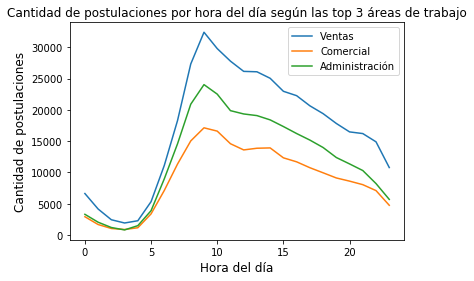

In [12]:
g = dfpostventas.groupby("hora")["idaviso"].count().plot()
g = dfpostcomercial.groupby("hora")["idaviso"].count().plot()
g = dfpostadministracion.groupby("hora")["idaviso"].count().plot()
g.set_title("Cantidad de postulaciones por hora del día según las top 3 áreas de trabajo")
g.set_xlabel("Hora del día", fontsize = 12)
g.set_ylabel("Cantidad de postulaciones", fontsize = 12)
g.legend(["Ventas","Comercial","Administración"])

En este gráfico se puede observar los máximos de cantidades por la mañana, alrededor de las 10 horas, que disminuyen por la tarde y noche hasta alcanzar el mínimo durante la madrugada. Este patrón corresponde con aquel explorado en la sección de "Cantidades vs Tiempo". Más allá de eso, no parece existir ninguna diferencia crucial entre estos gráficos, lo cual lleva a concluir que el horario en el que la gente se postula a estos avisos es independiente del área del mismo.